In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scprep
import graphtools
import os
import scanpy as sc
import anndata
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
adata = sc.read("../data/rna_figure_ready.h5ad")

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
EMT_genes = [
    "ZEB1",
    "LIX1L",
    "VIM",
    "AXL",
    "MMP2",
    "ANTXR2",
    #'C3orf21',
    "FN1",
    "NRP1",
    "TGFBI",
    "GALNT5",
    "PPARG",
    "HNMT",
    "CARD6",
    "RBPMS",
    "TNFRSF21",
    "TMEM45B",
    "MPP7",
    "SSH3",
    #'MTAC2D1',
    #'MUC',
    "EPPK1",
    "SHROOM3",
    "EPN3",
    "PRSS22",
    "AP1M2",
    "SH3YL1",
    "KLC3",
    "SERINC2",
    #'EBPM',
    "FXYD3",
    "CLDN4",
    "CRB3",
    #'LRRC54',
    "MAPK13",
    "GALNT3",
    "STAP2",
    "AP1M2",
    "DSP",
    "ELMO3",
    "KRTCAP3",
    "MAL2",
    "F11R",
    #'GPR110',
    #'GPR56',
    "KRT19",
    "GRHL1",
    "BSPRY",
    "C1orf116",
    "S100A14",
    "SPINT2",
    "ANKRD22",
    "ST14",
    "GRHL2",
    "PRR5",
    "BSPRY",
    "TJP3",
    "TACSTD2",
    "CDH3",
    #'C1orf172',
    "CDS1",
    "MPZL2",
    #'INADL',
    "EPN3",
    #'RBM35A',
    "TMC4",
    "ITGB6",
    "TMEM125",
    "EPHA1",
    "CDS1",
    "ENPP5",
    "ST14",
    "EPB41L5",
    "ERBB3",
    "RAB25",
    "PRSS8",
    "TMEM30B",
    "CLDN7",
    #'RBM35A',
    #'TACSTD1',
    "CDS1",
    "SCNN1A",
    "CDH1",
]
emt_expr = sc.get.obs_df(adata, keys=EMT_genes)
ecad_expr = sc.get.obs_df(adata, keys=["CDH1"])
weights = emt_expr.corr()[["CDH1"]]
emt_scores = pd.DataFrame(
    (np.array(emt_expr) * np.array(weights).T),
    index=emt_expr.index,
    columns=emt_expr.columns,
).sum(axis=1)
adata.obs["emt_scores"] = emt_scores

In [4]:
adata

AnnData object with n_obs × n_vars = 16985 × 21465
    obs: 'n_counts', 'batch', 'day', 'new', 'sample_id', 'growth', 'log_growth', 'sample_labels', 'louvain', 'S_score', 'G2M_score', 'phase', 'emt_scores'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'is_emt'
    uns: 'emt_weights', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors', 'sample_id_colors'
    obsm: 'X_pca', 'X_phate'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

<Axes: >

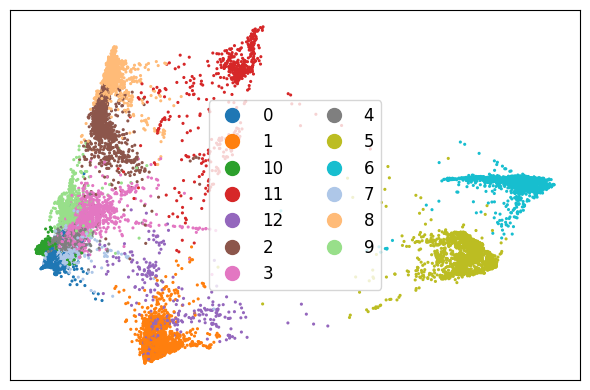

In [5]:
scprep.plot.scatter2d(
    adata.obsm["X_phate"], c=adata.obs["louvain"], figsize=(6, 4), ticks=[]
)

In [6]:
# %run ../src/dataset.py

# ds = ChafferData_v2("phate", max_dim=2)
# ds = 

In [7]:
# def load_trajectories(load_path):

#     zs = np.load(load_path)
#     print(zs.shape)
#     return zs


# # zs = load_trajectories("../results/chaffer_v3/2_phate_10000/backward_trajectories.npy")
# zs = load_trajectories("../results/chaffer_v3/3_phate_2000/backward_trajectories.npy")
# zs = load_trajectories("../results/chaffer_v3/2_phate_10000/backwards.npy")
# zs = load_trajectories("../results/chaffer_v3/3_phate_2000/backwards.npy")
# zs = load_trajectories("../results/chaffer_v3/2_phate_10000/backwards2.npy")

In [8]:
# zs = load_trajectories("../results/chaffer_v3/4_phate3d/backwards200_2.npy")

In [9]:
# import seaborn as sns

# numlines = 30
# for i in range(1, 11):
#     zs = load_trajectories(
#         "../results/chaffer_v3/2_phate_10000/backwards200_%d.npy" % i
#     )
#     dims = (0, 1)
#     fig, ax = plt.subplots(1, figsize=(6, 4))
#     data_pca = ds.get_data()
#     scprep.plot.scatter(
#         data_pca[:, dims[0]],
#         data_pca[:, dims[1]],
#         c="gray",
#         legend_anchor=(1, 1),
#         ticks=None,
#         xlabel=None,
#         label_prefix="PHATE",
#         ax=ax,
#         # title="All samples",
#         # xlabel="PHATE%d" % (dims[0] + 1),
#         # ylabel="PC%d" % (dims[1] + 1),
#     )
#     fig.tight_layout()
#     colors = [
#         adata.uns["louvain_colors"][c]
#         for c in list(adata[adata.obs["sample_id"] == 30].obs["louvain"].astype(int))
#     ][:numlines]
#     # scprep.plot.scatter2d(zs[-1], ax=ax)
#     numlines = 30
#     for i in range(numlines):
#         plt.plot(zs[:, i, dims[0]], zs[:, i, dims[1]], linewidth=1, c=colors[i])
#     plt.scatter(zs[0, :numlines, dims[0]], zs[0, :numlines, dims[1]], c=colors, s=200)

In [10]:
# def load_pca_trajectories(markers, load_path):
#     genes_mask = adata.var.index.isin(markers)
#     zs = np.load(load_path)
#     zss = zs * np.sqrt(adata.uns["pca"]["variance"][: zs.shape[-1]])
#     inverse = (
#         np.dot(zss, adata.varm["PCs"][genes_mask, :10].T)
#         + np.array(adata.X[:, genes_mask].mean(axis=0)).flatten()[None, None, :]
#     )
#     print(zss.shape)
#     return inverse

In [11]:
# bt_path = "../results/chaffer_v3/1_pca_10d_growth/backward_trajectories.npy"
all_markers = np.sort(
    ["SNAI1", "ZEB1", "ZEB2", "ITGA6", "LCN2", "CD44", "CD24", "CDH1", "MT-CO1"]
)
# inverse = load_pca_trajectories(all_markers, bt_path)

In [12]:
# def build_marker_plots(
#     adata, shape, markers, clusters, cmask=None, palette=None, order=None
# ):
#     genes_mask = adata.var.index.isin(markers)
#     if order is None:
#         order = adata.var[genes_mask].index
#     fig, ax = plt.subplots(*shape, figsize=(4 * shape[1], 4 * shape[0]), sharex=True)
#     ax = ax.flatten()
#     inverse = load_pca_trajectories(markers, bt_path)
#     print(inverse.shape)
#     tnet_traj = pd.DataFrame(
#         inverse.reshape(-1, len(markers)), columns=adata.var[genes_mask].index
#     )

#     df = pd.concat(
#         [
#             pd.Series(np.repeat(np.linspace(0, 4, 100)[::-1], 2971), name="timepoint"),
#             pd.Series(np.tile(clusters, 100), name="clusters")
#             .reset_index(drop=True)
#             .astype(int),
#             tnet_traj,
#         ],
#         axis=1,
#     )
#     if cmask is not None:
#         df = df[df["clusters"].isin(cmask)]
#     for i, gene in enumerate(order):
#         # palette = [
#         #    adata.uns["louvain_colors"][i]
#         #    for i in range(len(adata.uns["louvain_colors"]))
#         # ]
#         # palette = list(adata.uns["louvain_colors"])
#         sns.lineplot(
#             x="timepoint",
#             hue="clusters",
#             y=gene,
#             data=df,
#             ax=ax[i],
#             palette=palette,
#             # palette=palette,
#             ci="sd",
#         )
#         ax[i].set_title(gene)
#         ax[i].set_xticks([])


# adata30 = adata[adata.obs["sample_id"] == 30]
# build_marker_plots(
#     adata30,
#     (2, 5),
#     all_markers,
#     adata30.obs["louvain"],
#     cmask=["3", "8", "11"],
#     palette=[adata.uns["louvain_colors"][i] for i in [3, 8, 11]],
# )

In [13]:
adata30 = adata[adata.obs["day"] == 30]

In [14]:
from sklearn.cluster import KMeans

# Cluster trajectories in scaled PCA space
def cluster_trajectories(load_path, n_clusters=3):
    zs = np.load(load_path)
    zss = zs * np.sqrt(adata.uns["pca"]["variance"][: zs.shape[-1]])
    print(zss.shape)
    zss = np.swapaxes(zss, 0, 1)
    zss = zss.reshape(zss.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(zss)
    return kmeans.labels_
bt_path = '../results_final_Dec21/traj_pca_T.npy'

trajectory_clusters = cluster_trajectories(bt_path)

(100, 48, 50)


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
trajectory_clusters2 = cluster_trajectories(bt_path, n_clusters=5)

(100, 48, 50)


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
trajectory_clusters2.shape

(48,)

In [17]:
# adata30.obs["trajectory_clusters2"] = trajectory_clusters2
# adata30.obs["trajectory_clusters2"] = adata30.obs["trajectory_clusters2"].astype(
#     "category"
# )

In [18]:
# adata30.write("adata30_with_traj_clusters.h5ad")

In [19]:
trajectory_clusters.shape

(48,)

In [20]:
# build_marker_plots(adata30, (2, 5), all_markers, trajectory_clusters, palette="tab10")

In [21]:
# adata30.obs["trajectory_clusters"] = trajectory_clusters
# adata30.obs["trajectory_clusters"] = adata30.obs["trajectory_clusters"].astype(
#     "category"
# )

In [22]:
# sc.pl.scatter(
#     adata30, basis="phate", color="trajectory_clusters",
# )

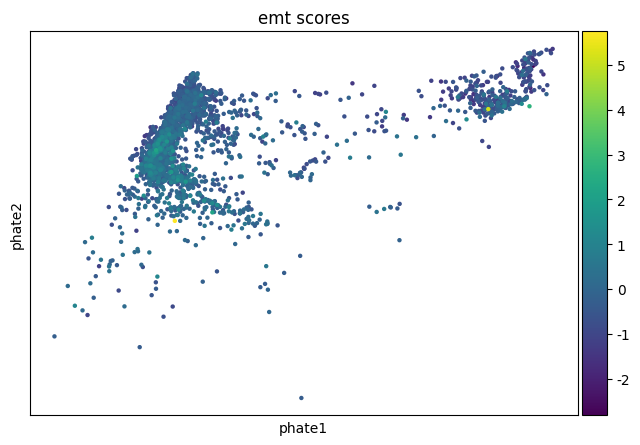

In [23]:
sc.pl.scatter(adata30, basis="phate", color="emt_scores")

In [24]:
# import seaborn as sns

# sns.barplot(data=adata30.obs, x="trajectory_clusters", y="emt_scores")

In [25]:
# adata30.obs

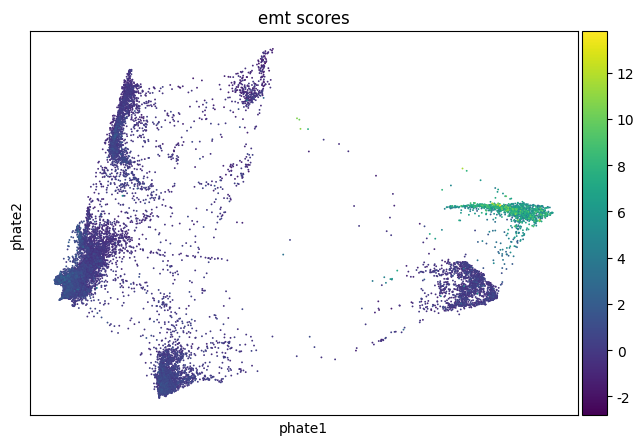

In [26]:
sc.pl.scatter(adata, basis="phate", color="emt_scores")

In [27]:
# emt_gene_file = "../data/EMTome_signatures.gmt.txt"
# with open(emt_gene_file, "r") as f:
#     emt_genes = np.unique(f.read().split())
#     emt_genes = np.array([e for e in emt_genes if not "." in e])
#     emt_genes = np.array([e for e in emt_genes if not "PMID" in e])

In [28]:
# emt_genes

In [29]:
# emt_mask = adata30.var.index.isin(emt_genes)

In [30]:
# exp_mask = adata.var.n_counts > 100
# compare_mask = emt_mask & exp_mask
# compare_genes = adata.var.index[compare_mask]
# sum(emt_mask), sum(exp_mask), sum(compare_mask)


In [31]:
# pd.Series(["CHD1"]).isin(compare_genes)

In [32]:
# compare_genes

In [33]:
# len(EMT_genes)

In [34]:
# EMT_small_union = np.array(EMT_genes)[pd.Series(EMT_genes).isin(adata.var.index)]

In [35]:
# sum(pd.Series(EMT_genes).isin(adata.var.index))

In [36]:
# EMT_small_union = adata.var.index[adata.var.index.isin(np.array(EMT_genes))]

In [37]:
# sum(adata.var.index.isin(np.array(EMT_genes)))

In [38]:
# This is very odd

In [39]:
# np.array(EMT_genes)

<Axes: xlabel='sample_id', ylabel='VIM'>

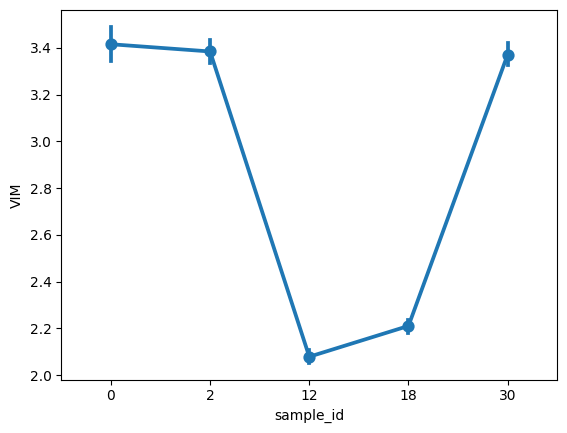

In [40]:
gene = "VIM"
sns.pointplot(
    x="sample_id", y=gene, data=sc.get.obs_df(adata, keys=["sample_id", gene]), 
)

In [41]:
# def emt_plot(adata, shape, markers, clusters, cmask=None, palette=None):
#     genes_mask = adata.var.index.isin(markers)
#     fig, ax = plt.subplots(*shape, figsize=(10 * shape[1], 10 * shape[0]), sharex=True)
#     # ax = ax.flatten()
#     inverse = load_pca_trajectories(markers, bt_path)
#     print(inverse.shape)
#     tnet_traj = pd.DataFrame(
#         inverse.reshape(-1, len(markers)), columns=adata.var[genes_mask].index
#     )
#     scores = tnet_traj @ weights.T[tnet_traj.columns].T
#     scores.columns = ["EMT_score"]
#     df = pd.concat(
#         [
#             pd.Series(np.repeat(np.linspace(0, 4, 100)[::-1], 2971), name="timepoint"),
#             pd.Series(np.tile(clusters, 100), name="clusters")
#             .reset_index(drop=True)
#             .astype(int),
#             scores,
#         ],
#         axis=1,
#     )
#     if cmask is not None:
#         df = df[df["clusters"].isin(cmask)]
#     i = 0
#     sns.lineplot(
#         x="timepoint",
#         hue="clusters",
#         y="EMT_score",
#         data=df,
#         ax=ax,
#         palette=palette,
#         # palette=palette,
#         ci="sd",
#     )
#     ax.set_title("EMT_score")
#     ax.set_xticks([])

In [42]:
# EMT_small_union

In [43]:
# tnet_traj = emt_plot(
#     adata30, (1, 1), EMT_small_union, trajectory_clusters, palette="tab10"
# )

In [44]:
# tnet_traj = emt_plot(
#     adata30, (1, 1), EMT_small_union, trajectory_clusters2, palette="tab10"
# )

In [45]:
# %%time
# What genes have the most different Trajectories between clusters 0 and 2?
# Measured by absolute divergence of means over the 100 points...
def traj_deviation(adata, markers, clusters, cmask=None, palette=None):
    genes_mask = adata.var.index.isin(markers)
    # inverse = load_pca_trajectories(markers, bt_path)
    inverse = np.load('../results_final_Dec21/traj_gene_space_T.npy')
    print(inverse.shape)
    tnet_traj = pd.DataFrame(
        inverse.reshape(-1, len(markers)), columns=adata.var[genes_mask].index
    )
    print('df')
    df = pd.concat(
        [
            pd.Series(np.repeat(np.linspace(0, 4, 100)[::-1], 2971), name="timepoint"),
            pd.Series(np.tile(clusters, 100), name="clusters")
            .reset_index(drop=True)
            .astype(int),
            tnet_traj,
        ],
        axis=1,
    )
    return df


td = traj_deviation(
    adata30,
    adata.var.index,
    trajectory_clusters2,
)


(100, 48, 21465)
df


In [46]:
mean_traj = td.groupby(["timepoint", "clusters"]).mean().reset_index()

In [47]:
mean_traj_no_cluster = td.groupby(["timepoint"]).mean().reset_index()

AL627309.1  AL669831.5    FAM87B  LINC00115    FAM41C  AL645608.3  \
timepoint                                                                      
0.000000     0.001312    0.028354  0.006635   0.010198  0.046382    0.029391   
0.040404     0.001348    0.028763  0.007051   0.010857  0.046395    0.028562   
0.080808     0.001383    0.029176  0.007459   0.011534  0.046407    0.027708   
0.121212     0.001416    0.029589  0.007858   0.012225  0.046418    0.026835   
0.161616     0.001449    0.030002  0.008245   0.012927  0.046424    0.025947   
...               ...         ...       ...        ...       ...         ...   
3.838384     0.001153    0.029996  0.004061   0.020040  0.032781    0.003424   
3.878788     0.001152    0.030044  0.004439   0.020060  0.032688    0.003435   
3.919192     0.001151    0.030095  0.004828   0.020082  0.032588    0.003451   
3.959596     0.001150    0.030149  0.005226   0.020105  0.032483    0.003471   
4.000000     0.001149    0.030206  0.005633   0.020130  0.032370    0.003496   

           AL645608.5  AL645608.1    SAMD11     NOC2L  ...  AC136616.1  \
timepoint                                              ...               
0.000000     0.000781    0.035331  0.194986  0.587465  ...    0.014324   
0.040404     0.000773    0.034208  0.188705  0.582379  ...    0.014463   
0.080808     0.000765    0.033072  0.182284  0.576907  ...    0.014623   
0.121212     0.000759    0.031925  0.175751  0.571106  ...    0.014802   
0.161616     0.000753    0.030772  0.169134  0.565030  ...    0.014995   
...               ...         ...       ...       ...  ...         ...   
3.838384     0.000483    0.002799  0.014580  0.448584  ...    0.012820   
3.878788     0.000459    0.002907  0.014843  0.450885  ...    0.012772   
3.919192     0.000435    0.003020  0.015133  0.453283  ...    0.012724   
3.959596     0.000411    0.003138  0.015452  0.455777  ...    0.012675   
4.000000     0.000386    0.003260  0.015799  0.458362  ...    0.012625   

           BX004987.1  AC145212.1     MAFIP  AC011043.1  AL592183.1  \
timepoint                                                             
0.000000     0.004238    0.000209  0.004145    0.001999    0.010156   
0.040404     0.004177    0.000236  0.004093    0.002097    0.010249   
0.080808     0.004111    0.000264  0.004042    0.002200    0.010337   
0.121212     0.004042    0.000292  0.003993    0.002308    0.010419   
0.161616     0.003970    0.000322  0.003944    0.002420    0.010494   
...               ...         ...       ...         ...         ...   
3.838384     0.000821    0.000701  0.002094    0.004669    0.008335   
3.878788     0.000814    0.000701  0.002092    0.004671    0.008463   
3.919192     0.000807    0.000701  0.002089    0.004672    0.008594   
3.959596     0.000801    0.000701  0.002085    0.004674    0.008727   
4.000000     0.000794    0.000702  0.002081    0.004676    0.008863   

           AC007325.4  AL354822.1  AC004556.1  AC240274.1  
timepoint                                                  
0.000000     0.045257    0.001667    0.001279    0.018173  
0.040404     0.048221    0.001681    0.001283    0.018120  
0.080808     0.051409    0.001692    0.001285    0.018074  
0.121212     0.054786    0.001700    0.001286    0.018035  
0.161616     0.058320    0.001707    0.001285    0.018000  
...               ...         ...         ...         ...  
3.838384     0.125250    0.002308    0.001089    0.016779  
3.878788     0.122877    0.002319    0.001154    0.016987  
3.919192     0.120418    0.002331    0.001220    0.017200  
3.959596     0.117872    0.002344    0.001287    0.017416  
4.000000     0.115240    0.002358    0.001355    0.017636  

[100 rows x 21465 columns]

<IPython.core.display.Javascript object>

In [48]:
np.abs(
    (
        mean_traj[mean_traj.clusters == 0]
        .reset_index()
        .subtract(mean_traj[mean_traj.clusters == 1].reset_index())
    )
).mean(axis=0)[3:]

AL627309.1    0.000160
AL669831.5    0.003232
FAM87B        0.005957
LINC00115     0.004041
FAM41C        0.010689
                ...   
AL592183.1    0.003211
AC007325.4    0.040146
AL354822.1    0.000166
AC004556.1    0.000745
AC240274.1    0.007990
Length: 21465, dtype: float64

In [49]:
mean_traj.to_pickle("../results_final_Dec21/cluster_trajectories.pkl")

In [50]:
mt = mean_traj.set_index(["timepoint", "clusters"])

In [51]:
emt_traj = mt.loc[:, EMT_genes]


In [52]:
emt_traj

ZEB1     LIX1L       VIM       AXL      MMP2  \
timepoint clusters                                                     
3.959596  0.0       0.239319  0.269198  2.860938  0.291175  0.100555   
          1.0       0.232693  0.328194  2.751619  0.700406 -0.095264   
          2.0       0.228537  0.299278  2.765520  0.498586  0.010032   
          3.0       0.283187  0.348672  2.994963  0.658807 -0.111503   
          4.0       0.262502  0.319509  2.929164  0.523310 -0.024686   
4.000000  0.0       0.296335  0.318268  3.569311  0.539469  0.226500   
          1.0       0.269344  0.327253  3.303307  0.599353  0.157880   
          2.0       0.283743  0.327616  3.446509  0.562389  0.197308   
          3.0       0.255594  0.325854  3.161281  0.653874  0.115270   
          4.0       0.272129  0.321888  3.333016  0.585267  0.168251   

                      ANTXR2       FN1      NRP1     TGFBI    GALNT5  ...  \
timepoint clusters                                                    ...   
3.959596  0.0       0.214461  2.480442  0.290762  0.931712  0.001182  ...   
          1.0       0.304676  3.075308  0.453023  0.132613  0.001359  ...   
          2.0       0.258136  2.664358  0.374606  0.510241  0.001231  ...   
          3.0       0.304532  3.433607  0.418933  0.265484  0.001349  ...   
          4.0       0.269381  3.001223  0.374750  0.513663  0.001269  ...   
4.000000  0.0       0.299292  1.535556  0.349300  0.928674  0.000535  ...   
          1.0       0.319921  1.621712  0.374863  0.629850  0.000581  ...   
          2.0       0.315699  1.523327  0.360039  0.786468  0.000578  ...   
          3.0       0.323829  1.748795  0.396276  0.459963  0.000574  ...   
          4.0       0.311602  1.629976  0.368927  0.685138  0.000568  ...   

                        ST14   EPB41L5     ERBB3     RAB25     PRSS8  \
timepoint clusters                                                     
3.959596  0.0       0.007321  0.051664  0.019730  0.004188  0.006711   
          1.0       0.006313  0.028111  0.021261 -0.004679  0.007126   
          2.0       0.006745  0.039218  0.020787  0.000727  0.006883   
          3.0       0.005897  0.026983  0.018889 -0.009513  0.006221   
          4.0       0.006292  0.035617  0.019321 -0.003767  0.006520   
4.000000  0.0       0.013648  0.056874  0.016642  0.023869  0.005342   
          1.0       0.011141  0.051919  0.018362  0.016717  0.003494   
          2.0       0.012355  0.055961  0.016939  0.019730  0.003808   
          3.0       0.010668  0.046984  0.020269  0.015935  0.003997   
          4.0       0.011579  0.052517  0.018168  0.018030  0.003987   

                     TMEM30B     CLDN7      CDS1    SCNN1A      CDH1  
timepoint clusters                                                    
3.959596  0.0       0.009994  0.144632  0.064748  0.002561  0.007897  
          1.0       0.014245  0.174662  0.063353 -0.000286  0.010135  
          2.0       0.011572  0.158004  0.064127  0.001357  0.008156  
          3.0       0.014579  0.181591  0.062521 -0.001304  0.010648  
          4.0       0.012304  0.167927  0.063226  0.000169  0.008916  
4.000000  0.0       0.010167  0.158634  0.056448  0.005567  0.010342  
          1.0       0.008963  0.147341  0.057887  0.005501  0.008083  
          2.0       0.008698  0.151285  0.058280  0.005665  0.008937  
          3.0       0.010406  0.148278  0.057874  0.005339  0.008350  
          4.0       0.009504  0.149012  0.057416  0.005492  0.008561  

[10 rows x 71 columns]

In [53]:
emt0 = emt_traj.xs(0, level="clusters").T
emt1 = emt_traj.xs(1, level="clusters").T

In [54]:
from sklearn.preprocessing import StandardScaler

scaled_emt0 = pd.DataFrame(StandardScaler().fit_transform(emt0.T)).T
scaled_emt1 = pd.DataFrame(StandardScaler().fit_transform(emt1.T)).T

72


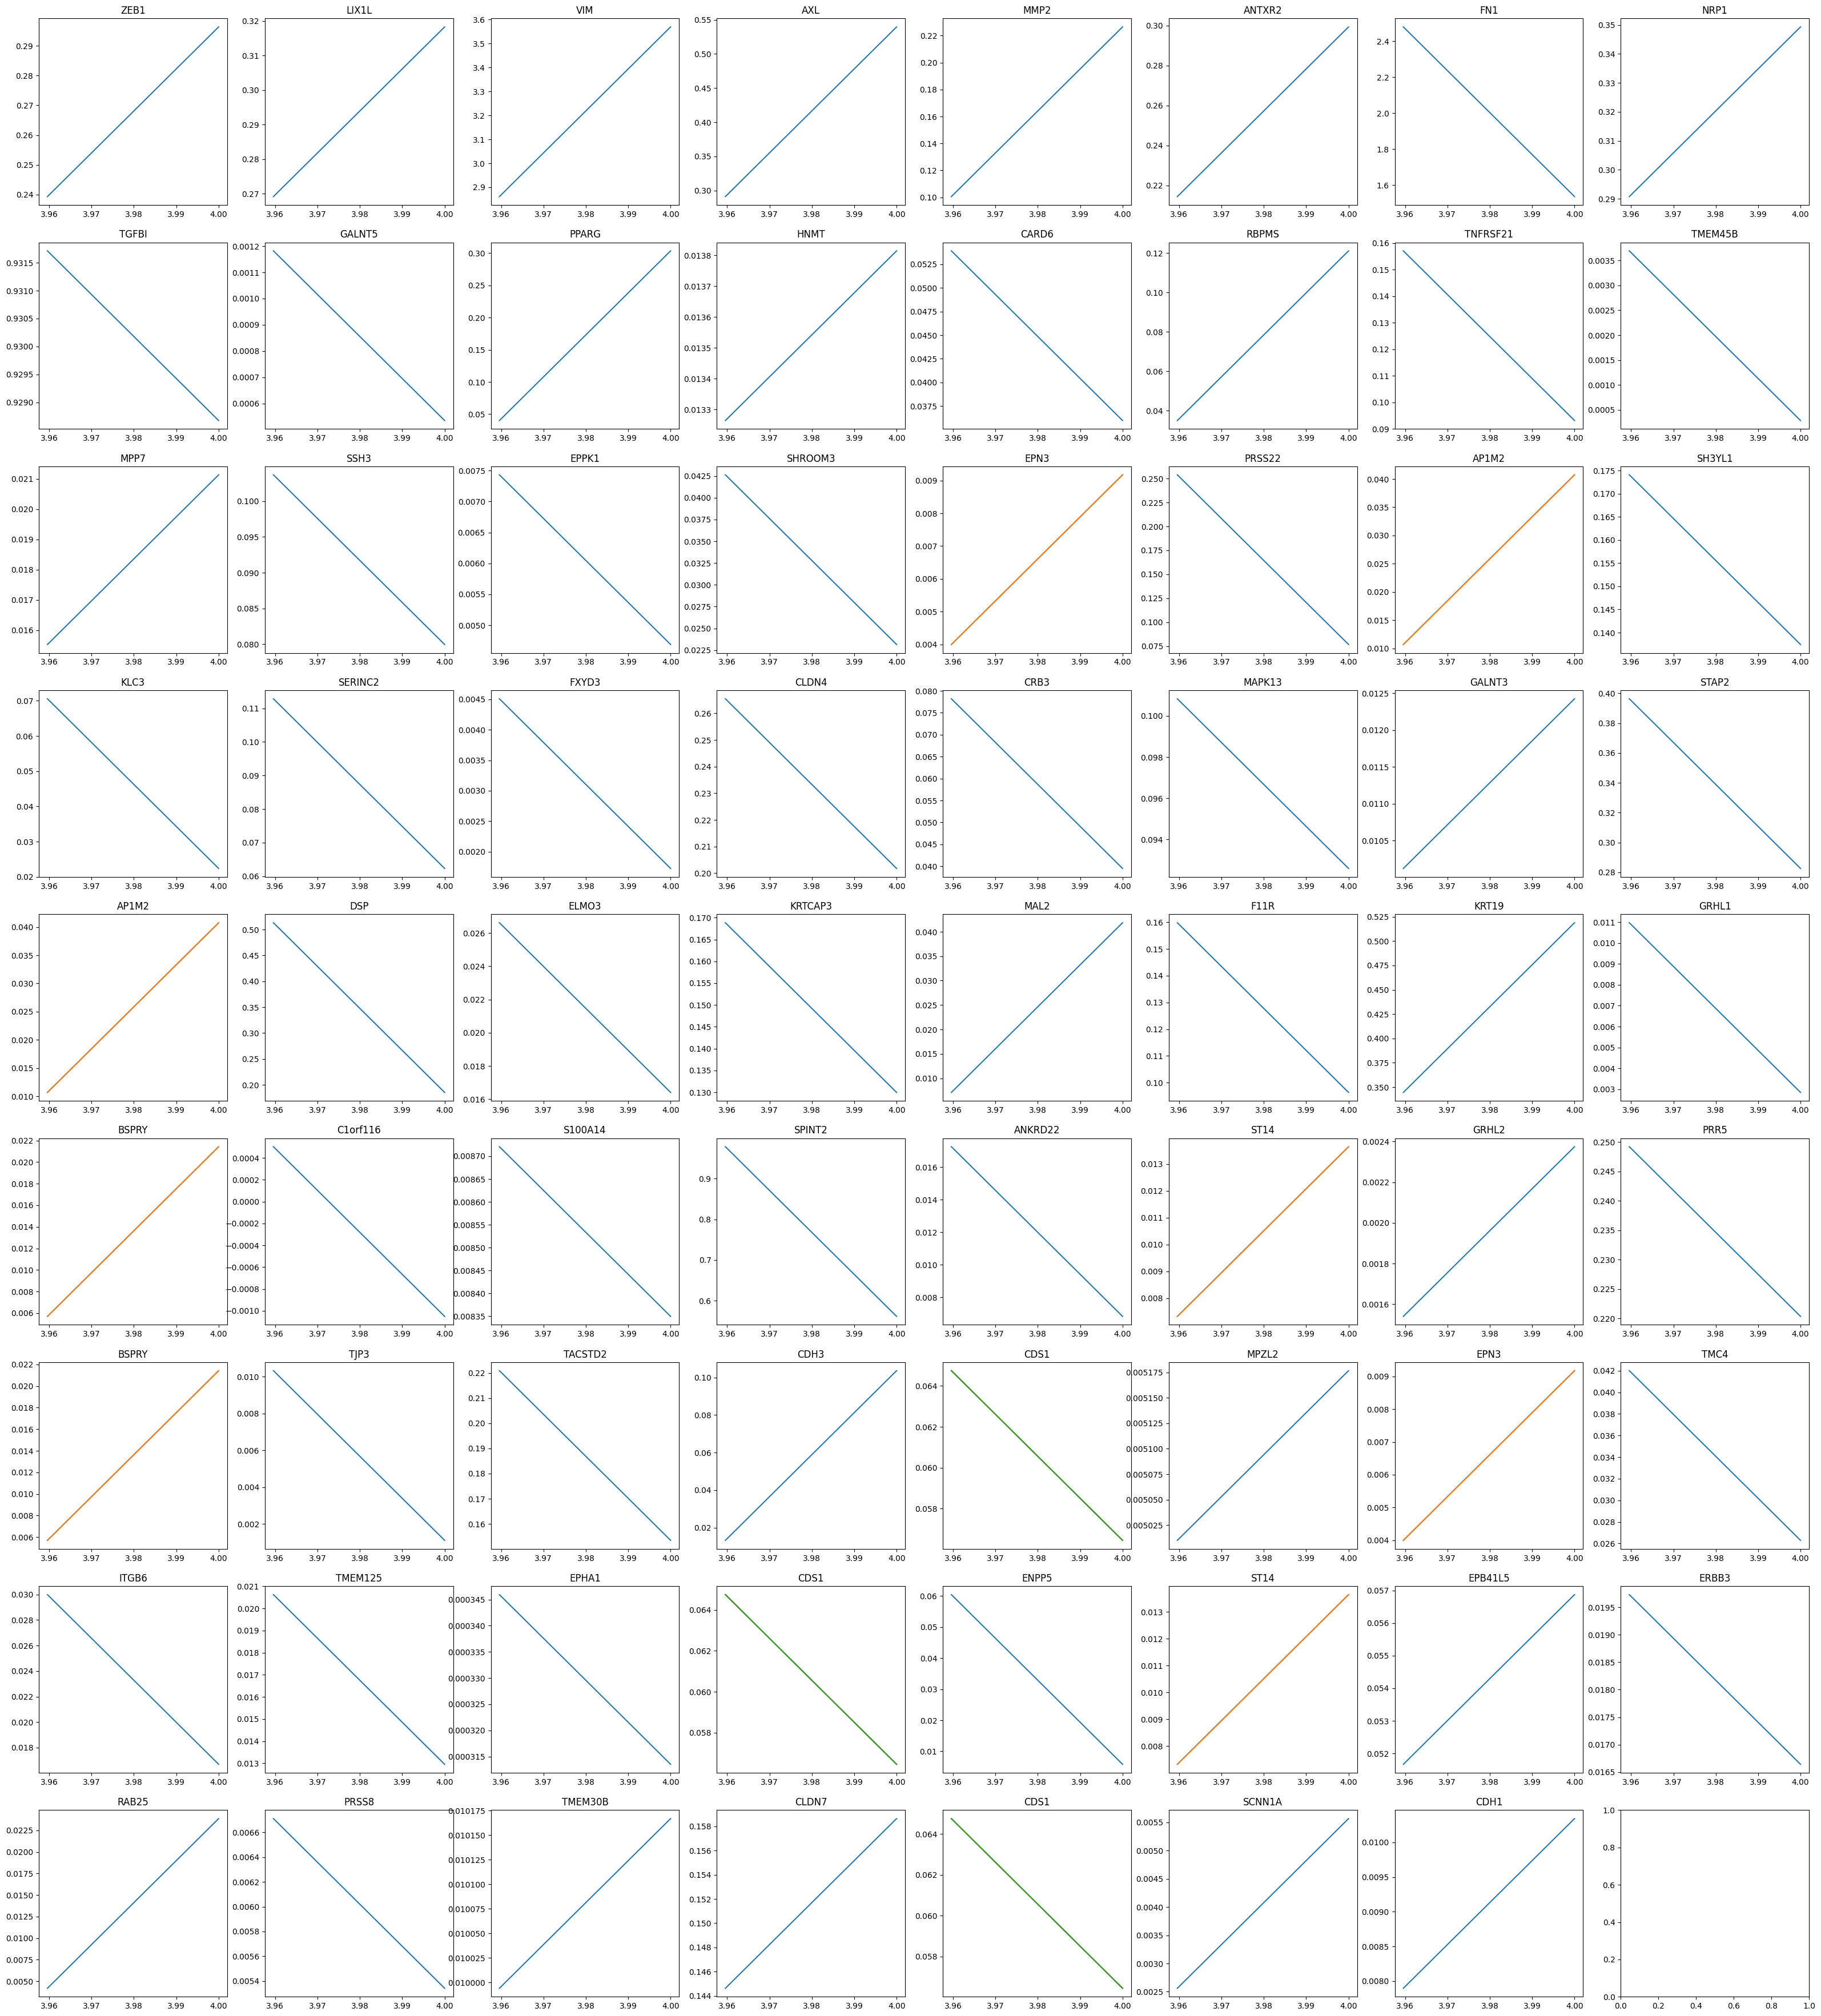

In [55]:
fig, axes = plt.subplots(9, 8, figsize=(40, 45))
axes = axes.flatten()
print(len(axes))
for i, gene in enumerate(EMT_genes):
    axes[i].plot(emt0.columns, emt0.T[[gene]])
    axes[i].set_title(gene)

72


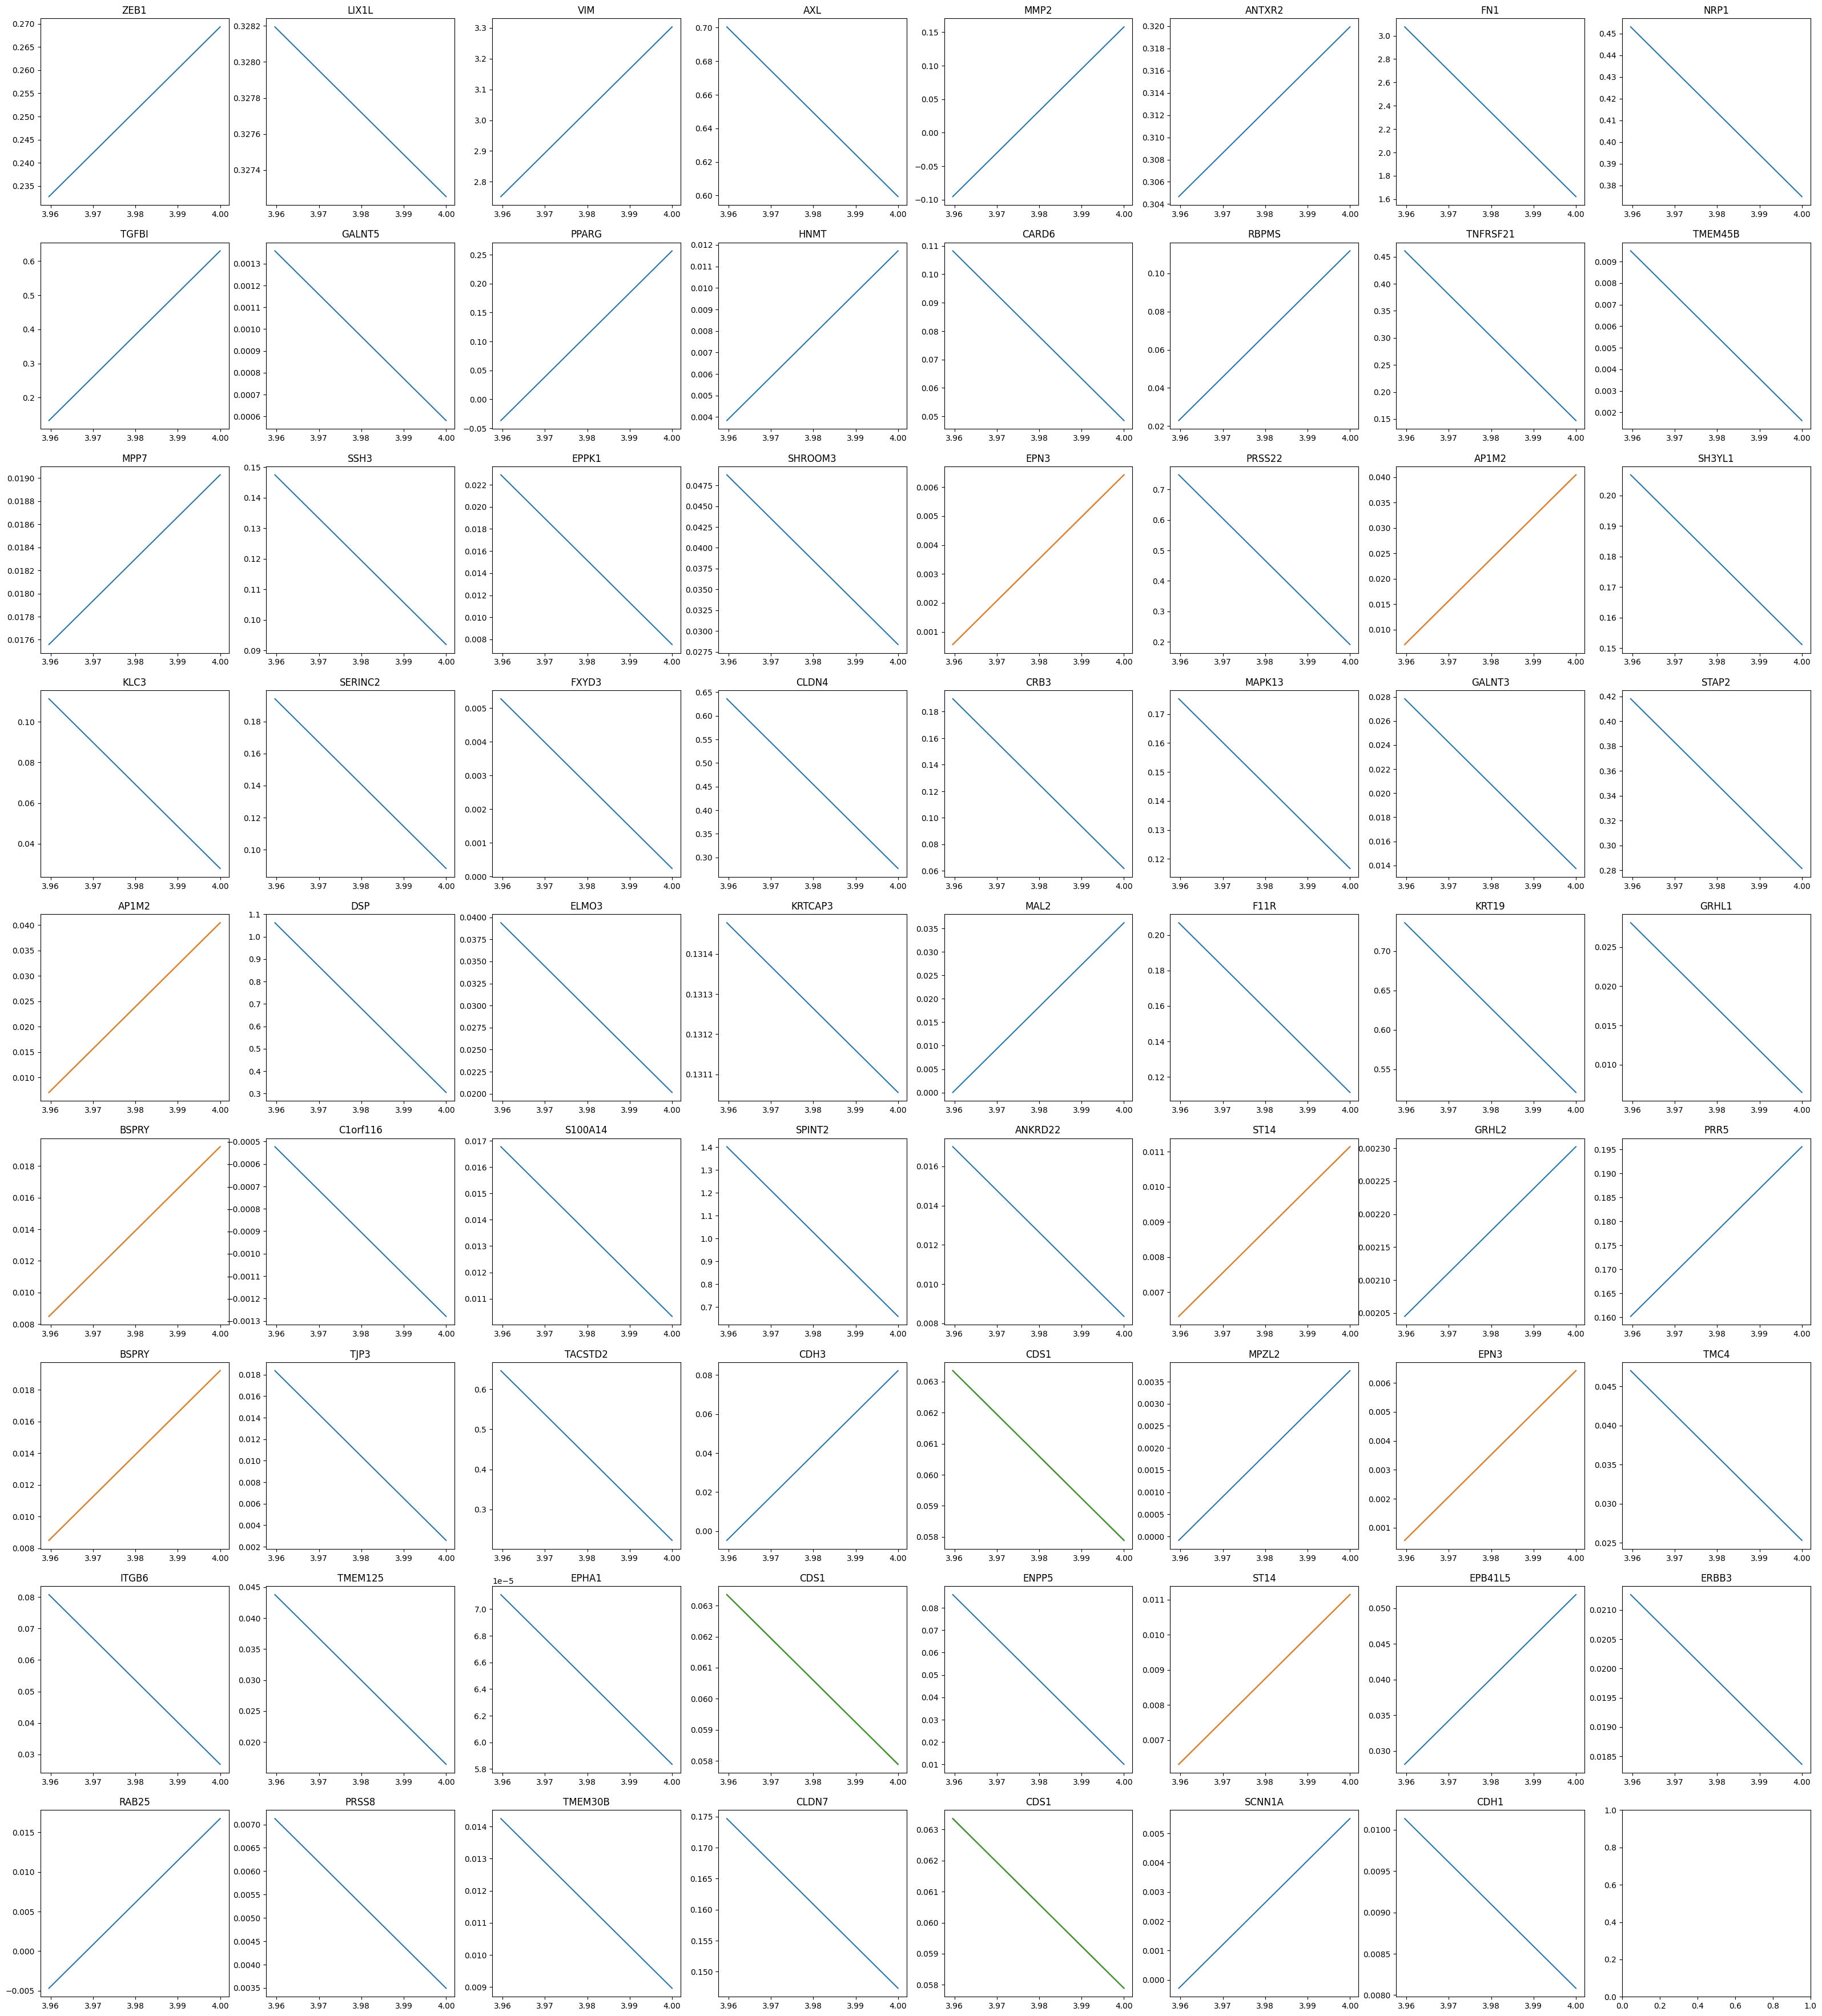

In [56]:
fig, axes = plt.subplots(9, 8, figsize=(40, 45))
axes = axes.flatten()
print(len(axes))
for i, gene in enumerate(EMT_genes):
    axes[i].plot(emt1.columns, emt1.T[[gene]])
    axes[i].set_title(gene)

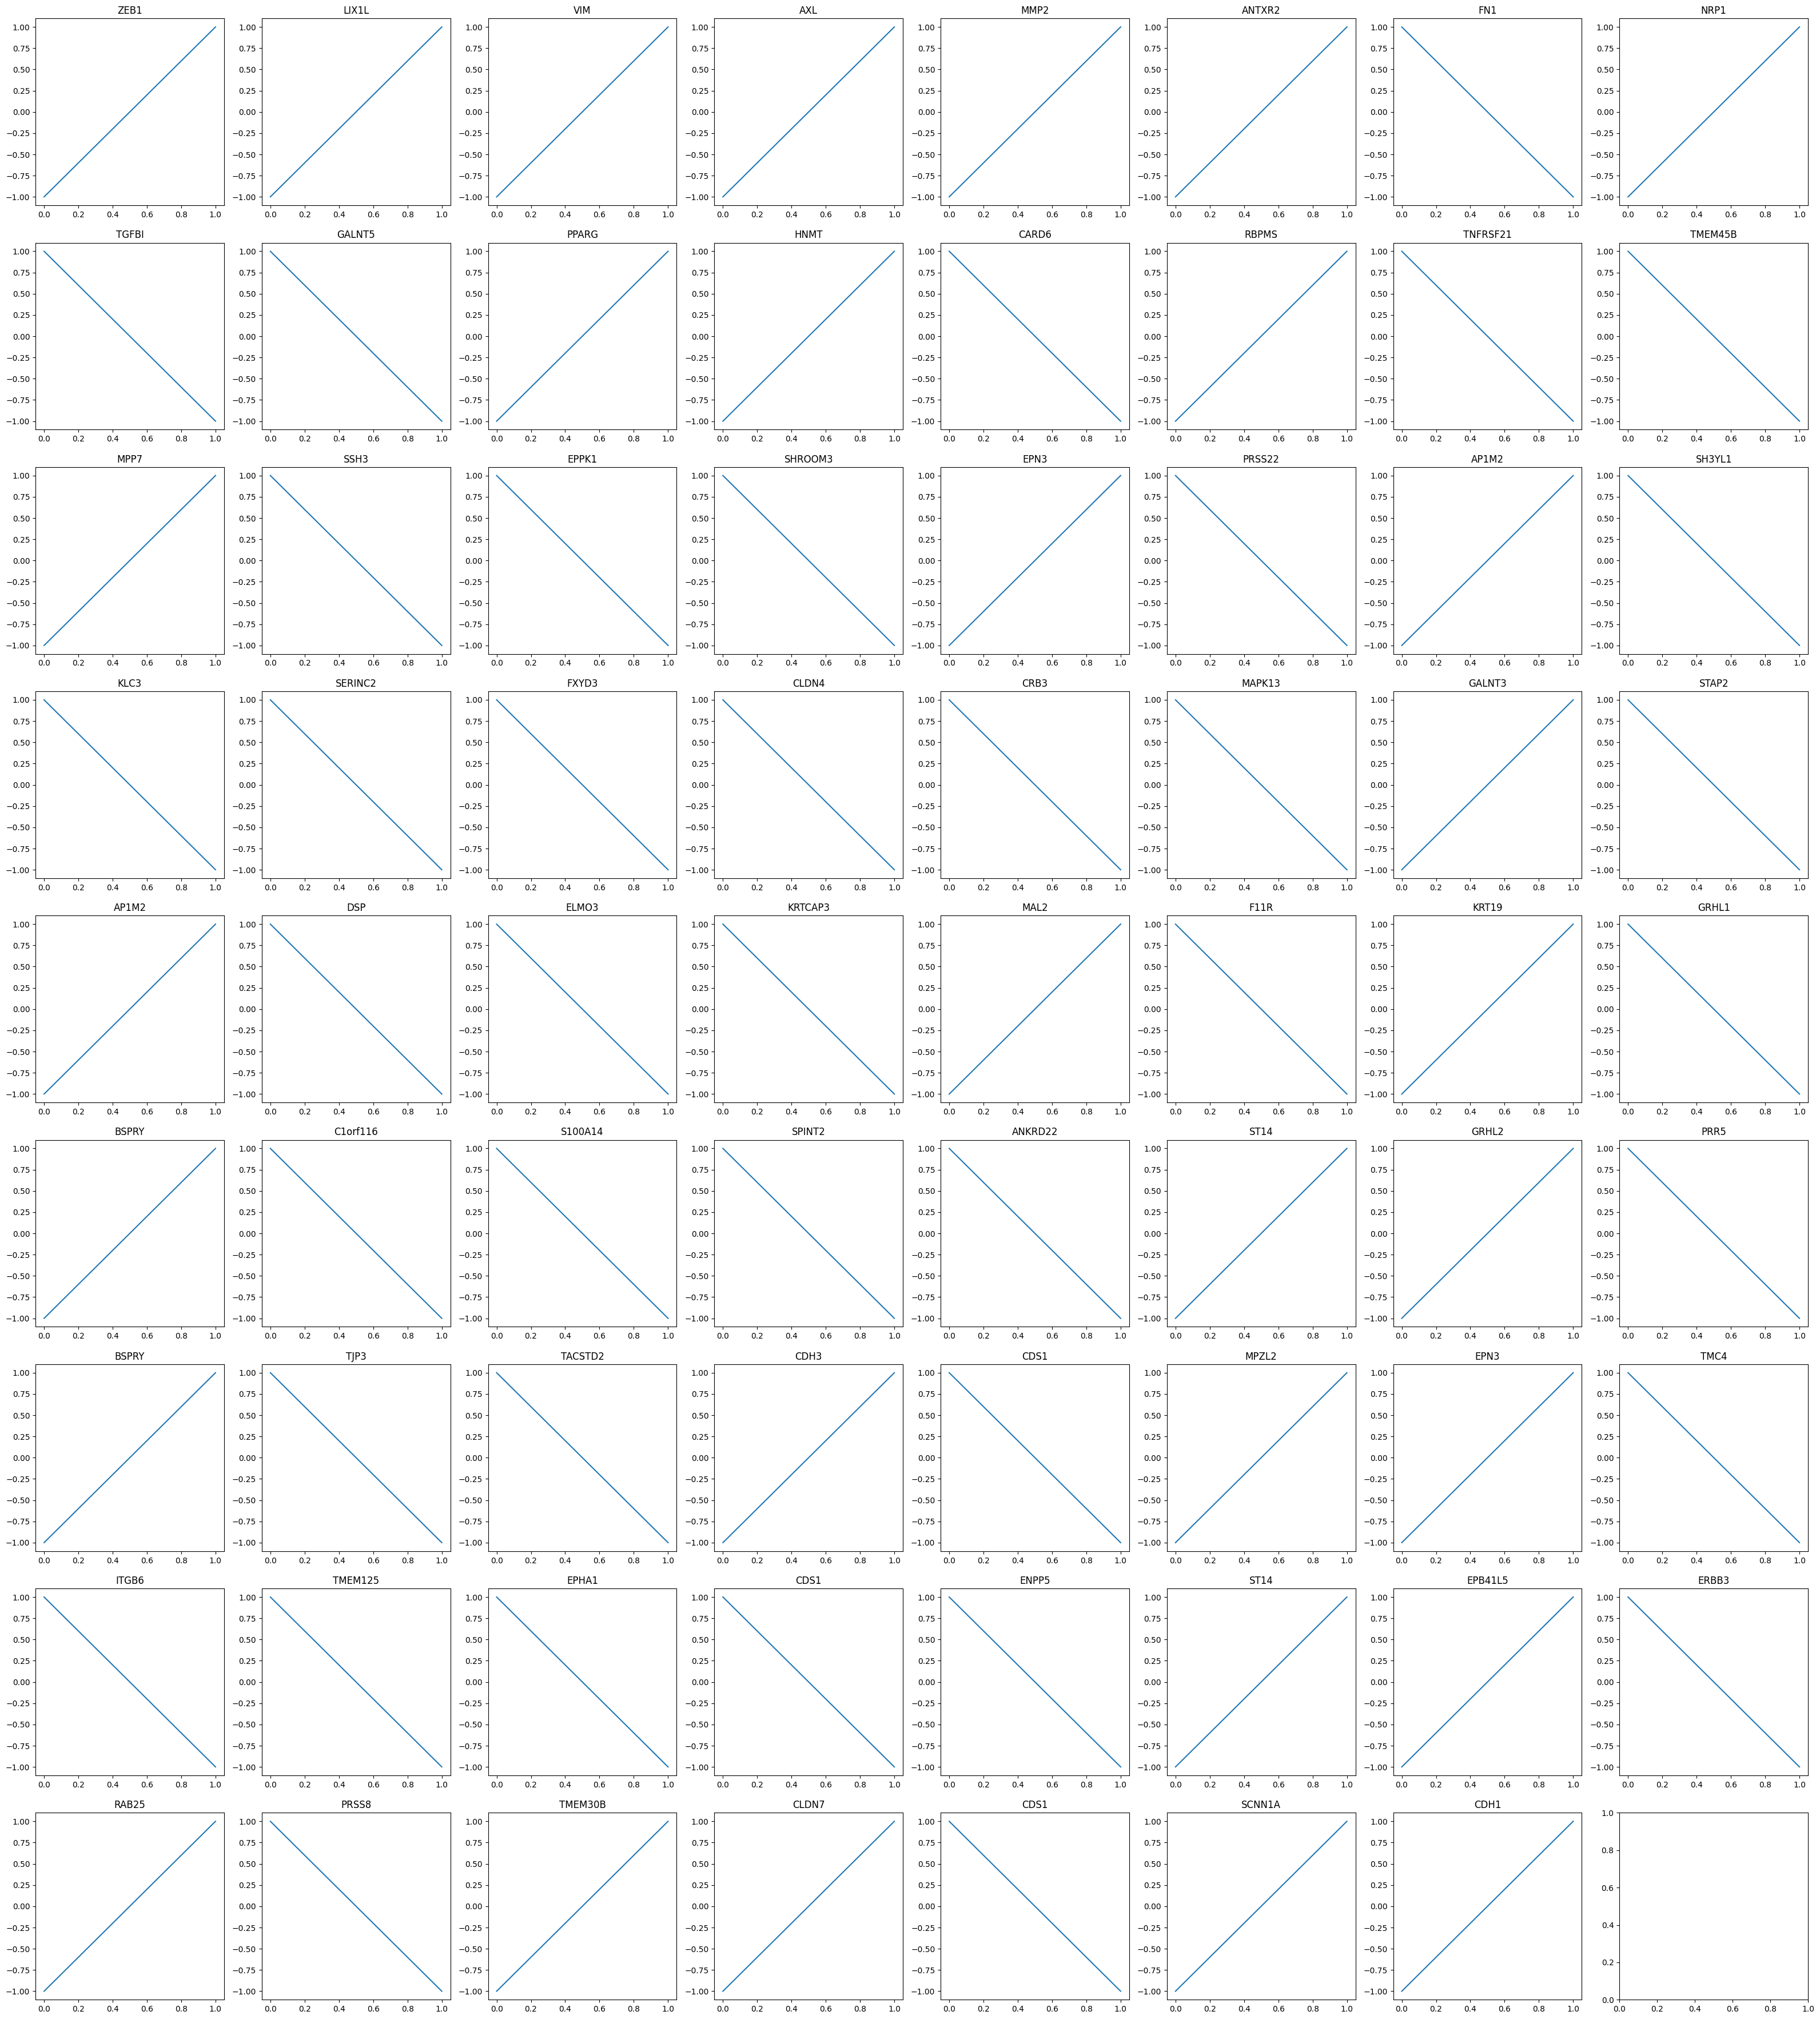

In [57]:
fig, axes = plt.subplots(9, 8, figsize=(40, 45))
axes = axes.flatten()
for i, gene in enumerate(EMT_genes):
    axes[i].plot(scaled_emt0.columns, scaled_emt0.T.iloc[:, i])
    axes[i].set_title(gene)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


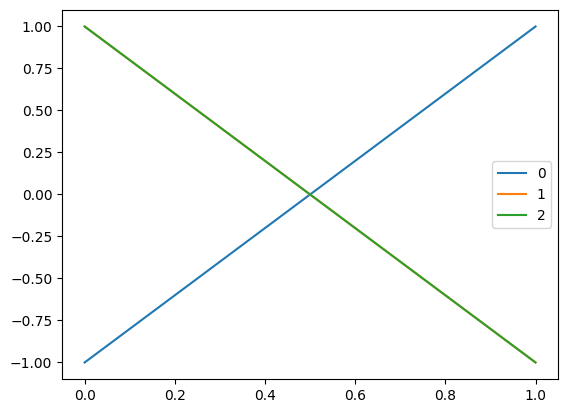

In [58]:
from sklearn.cluster import KMeans

n_clusters = 3
km = KMeans(random_state=42, n_clusters=n_clusters)
km.fit(scaled_emt0)

for i in range(n_clusters):
    plt.plot(km.cluster_centers_[i], label=i)
plt.legend()

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


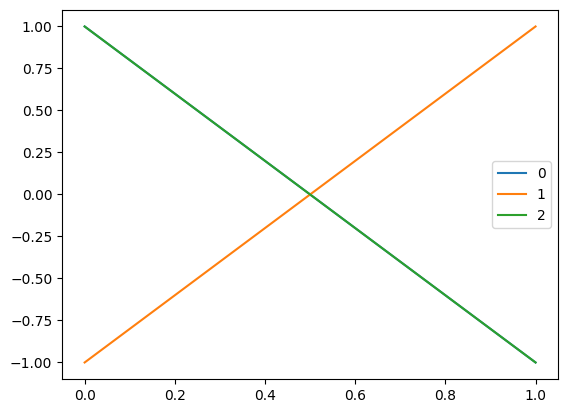

In [59]:
km1 = KMeans(random_state=42, n_clusters=n_clusters)
km1.fit(scaled_emt1)

for i in range(n_clusters):
    plt.plot(km1.cluster_centers_[i], label=i)
plt.legend()

In [60]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([31, 39,  1]))

In [61]:
np.unique(km1.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([46, 25]))

In [62]:
for g in np.sort(np.array(EMT_genes)[km.labels_ == 1]):
    print(g)

ANKRD22
C1orf116
CARD6
CDS1
CDS1
CDS1
CLDN4
CRB3
DSP
ELMO3
ENPP5
EPHA1
EPPK1
ERBB3
F11R
FN1
FXYD3
GALNT5
GRHL1
ITGB6
KLC3
KRTCAP3
MAPK13
PRSS22
PRSS8
S100A14
SERINC2
SH3YL1
SHROOM3
SPINT2
SSH3
STAP2
TACSTD2
TGFBI
TJP3
TMC4
TMEM125
TMEM45B
TNFRSF21


In [63]:
for g in np.sort(np.array(EMT_genes)[km1.labels_ == 2]):
    print(g)

In [64]:
# 1 is more epithelial than 0. 

In [65]:
mt.reset_index().groupby("timepoint").mean()

clusters  AL627309.1  AL669831.5    FAM87B  LINC00115    FAM41C  \
timepoint                                                                    
3.959596        2.0    0.001274    0.023066 -0.002471   0.024750  0.058245   
4.000000        2.0    0.001662    0.028055  0.015621   0.020115  0.062023   

           AL645608.3  AL645608.5  AL645608.1    SAMD11  ...  AC136616.1  \
timepoint                                                ...               
3.959596    -0.002016   -0.000116   -0.003953 -0.017886  ...    0.006791   
4.000000     0.011952    0.000311    0.009108  0.078281  ...    0.017638   

           BX004987.1  AC145212.1     MAFIP  AC011043.1  AL592183.1  \
timepoint                                                             
3.959596     0.004575    0.000744  0.005384    0.001559    0.005074   
4.000000     0.003613    0.000553  0.003947    0.005456    0.014508   

           AC007325.4  AL354822.1  AC004556.1  AC240274.1  
timepoint                                                  
3.959596     0.187620    0.001449    0.000284    0.006860  
4.000000     0.132291    0.000736    0.001380    0.020415  

[2 rows x 21466 columns]

In [66]:
## All genes
all_genes0 = mt.xs(0, level="clusters").T
scaled0 = pd.DataFrame(StandardScaler().fit_transform(all_genes0.T)).T
all_genes1 = mt.xs(1, level="clusters").T
scaled1 = pd.DataFrame(StandardScaler().fit_transform(all_genes1.T)).T

In [67]:
all_genes = mean_traj_no_cluster.drop(columns=["clusters"]).set_index("timepoint").T
scaled = pd.DataFrame(StandardScaler().fit_transform(all_genes.T)).T

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


(-2.5, 2.5)

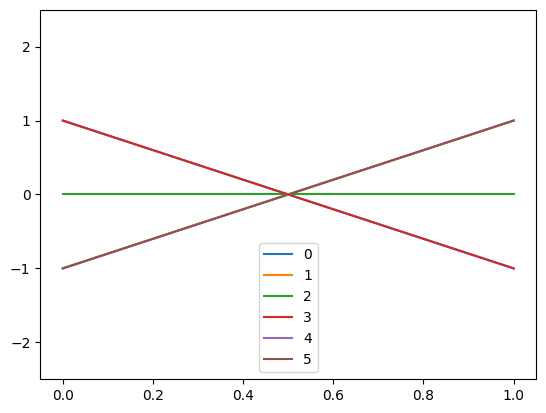

In [68]:
n_clusters = 6
km = KMeans(random_state=42, n_clusters=n_clusters)
km.fit(scaled0)

for i in range(n_clusters):
    plt.plot(km.cluster_centers_[i], label=i)
plt.legend()
plt.ylim(-2.5, 2.5)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(-2.5, 2.5)

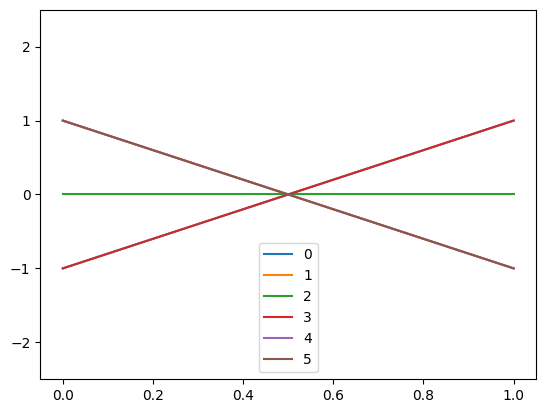

In [69]:
km = KMeans(random_state=42, n_clusters=n_clusters)
km.fit(scaled1)

for i in range(n_clusters):
    plt.plot(km.cluster_centers_[i], label=i)
plt.legend()
plt.ylim(-2.5, 2.5)

(-2.5, 2.5)

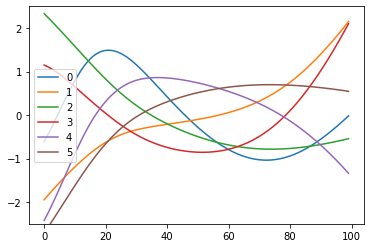

<IPython.core.display.Javascript object>

In [166]:
km = KMeans(random_state=42, n_clusters=n_clusters)
km.fit(scaled)

for i in range(n_clusters):
    plt.plot(km.cluster_centers_[i], label=i)
plt.legend()
plt.ylim(-2.5, 2.5)

In [143]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([5593, 2655, 1571, 1905, 4053, 3260, 1450,  978]))

<IPython.core.display.Javascript object>

(-2.5, 2.5)

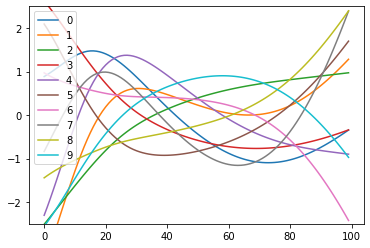

<IPython.core.display.Javascript object>

In [168]:
n_clusters = 10
km = KMeans(random_state=42, n_clusters=n_clusters)
km.fit(scaled)

for i in range(n_clusters):
    plt.plot(km.cluster_centers_[i], label=i)
plt.legend()
plt.ylim(-2.5, 2.5)

In [1]:
# Phate plot of all the gene trajectories
scaled.shape

NameError: name 'scaled' is not defined

In [172]:
tfs = pd.read_csv(
    "/home/atong/reference/gene_sets/Transcription_Factors.txt", sep="\t", header=None
)
tfs = tfs[1]

<IPython.core.display.Javascript object>

In [182]:
tfs = np.array([a.upper() for a in tfs.unique()])

<IPython.core.display.Javascript object>

In [186]:
tfs_in_data = list(set(adata.var.index) & set(tfs))

<IPython.core.display.Javascript object>

In [189]:
tf_mask = adata.var.index.isin(tfs_in_data)

<IPython.core.display.Javascript object>

In [191]:
adata_tfs = adata[:, tf_mask]

<IPython.core.display.Javascript object>

In [192]:
scaled.shape

(21465, 100)

<IPython.core.display.Javascript object>

In [193]:
adata.shape

(16985, 21465)

<IPython.core.display.Javascript object>

(-2.5, 2.5)

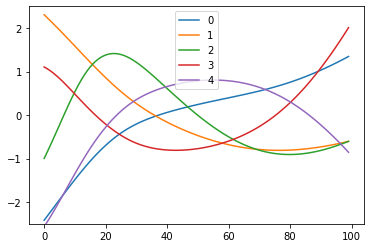

<IPython.core.display.Javascript object>

In [197]:
n_clusters = 5
km = KMeans(random_state=42, n_clusters=n_clusters)
km.fit(scaled[tf_mask])

for i in range(n_clusters):
    plt.plot(km.cluster_centers_[i], label=i)
plt.legend()
plt.ylim(-2.5, 2.5)

/home/atong/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


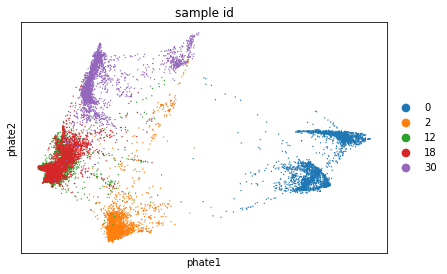

<IPython.core.display.Javascript object>

In [202]:
sc.pl.scatter(adata, basis="phate", color="sample_id")

In [204]:
# Get the distance to each cluster center...
km.cluster_centers_.shape

(5, 100)

<IPython.core.display.Javascript object>

In [205]:
from sklearn.metrics.pairwise import euclidean_distances

pdists = euclidean_distances(scaled[tf_mask], km.cluster_centers_)

<IPython.core.display.Javascript object>

In [211]:
tops = []
for i in range(5):
    ind = np.argsort(pdists[:, i])
    tops.append(ind[:10])

<IPython.core.display.Javascript object>

In [217]:
genes_per_cluster = []
for t in np.array(tops):
    genes_per_cluster.append(np.array(adata.var.index)[tf_mask][t])
genes_per_cluster = np.array(genes_per_cluster)

<IPython.core.display.Javascript object>

In [225]:
scaled[tf_mask]

0         1         2         3         4         5         6   \
8      3.035843  2.904918  2.771070  2.634882  2.496947  2.357879  2.218323   
9      3.113566  2.997828  2.873316  2.741323  2.603081  2.459764  2.312499   
22    -2.504128 -2.421324 -2.328363 -2.226732 -2.117764 -2.002657 -1.882501   
66     1.724055  1.684935  1.648665  1.614677  1.582400  1.551288  1.520832   
70     1.608592  1.613829  1.617674  1.620112  1.621086  1.620497  1.618199   
...         ...       ...       ...       ...       ...       ...       ...   
21380  2.550953  2.482646  2.411008  2.336477  2.259439  2.180225  2.099111   
21394 -2.297111 -2.240927 -2.183441 -2.124715 -2.064823 -2.003847 -1.941877   
21409 -2.362361 -2.275197 -2.178718 -2.074481 -1.963987 -1.848667 -1.729869   
21422 -2.729531 -2.620829 -2.504800 -2.382628 -2.255417 -2.124224 -1.990079   
21441 -3.161970 -2.996816 -2.834866 -2.676016 -2.520199 -2.367391 -2.217619   

             7         8         9   ...        90        91        92  \
8      2.078963  1.940527  1.803782  ... -0.743638 -0.740976 -0.737761   
9      2.162381  2.010479  1.857848  ... -0.273548 -0.232834 -0.189760   
22    -1.758308 -1.631033 -1.501594  ... -0.641920 -0.751371 -0.865089   
66     1.490571  1.460093  1.429036  ...  0.261516  0.381455  0.504598   
70     1.614000  1.607664  1.598915  ... -0.880882 -0.856895 -0.831403   
...         ...       ...       ...  ...       ...       ...       ...   
21380  2.016330  1.932071  1.846492  ... -0.582699 -0.557502 -0.531190   
21394 -1.879002 -1.815313 -1.750892  ...  0.832981  0.826053  0.818832   
21409 -1.608860 -1.486833 -1.364907  ...  1.534240  1.652856  1.773451   
21422 -1.854020 -1.717103 -1.580408  ... -0.381958 -0.486712 -0.595662   
21441 -2.070967 -1.927585 -1.787682  ...  0.594499  0.582768  0.570972   

             93        94        95        96        97        98        99  
8     -0.733986 -0.729647 -0.724740 -0.719259 -0.713201 -0.706561 -0.699336  
9     -0.144330 -0.096562 -0.046484  0.005866  0.060437  0.117172  0.176004  
22    -0.983036 -1.105157 -1.231391 -1.361669 -1.495906 -1.634021 -1.775919  
66     0.630763  0.759764  0.891424  1.025571  1.162036  1.300661  1.441293  
70    -0.804427 -0.775987 -0.746105 -0.714801 -0.682098 -0.648016 -0.612578  
...         ...       ...       ...       ...       ...       ...       ...  
21380 -0.503782 -0.475299 -0.445765 -0.415207 -0.383656 -0.351143 -0.317706  
21394  0.811339  0.803591  0.795606  0.787403  0.778999  0.770411  0.761659  
21409  1.895798  2.019671  2.144860  2.271169  2.398409  2.526411  2.655016  
21422 -0.708761 -0.825946 -0.947153 -1.072313 -1.201346 -1.334179 -1.470728  
21441  0.559159  0.547375  0.535658  0.524042  0.512556  0.501224  0.490068  

[1490 rows x 100 columns]

<IPython.core.display.Javascript object>

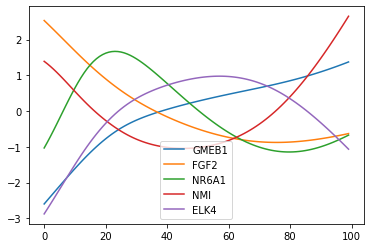

<IPython.core.display.Javascript object>

In [229]:
for ind in tops:
    for i in ind:
        plt.plot(scaled[tf_mask].iloc[i], label=np.array(adata.var.index)[tf_mask][i])
        break
plt.legend()

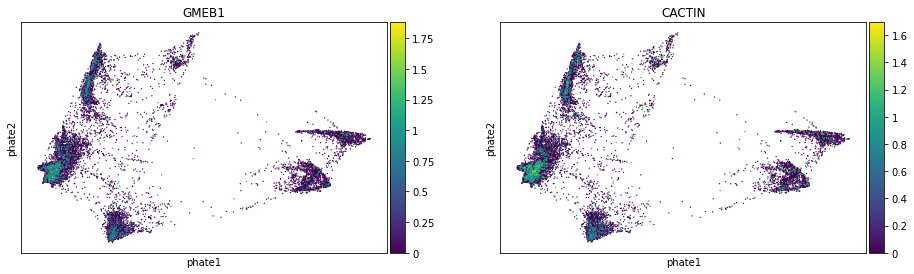

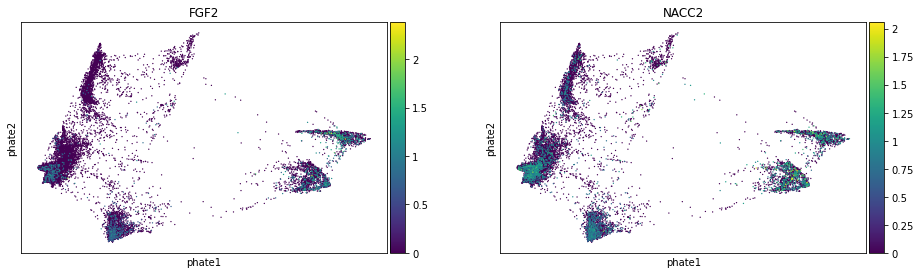

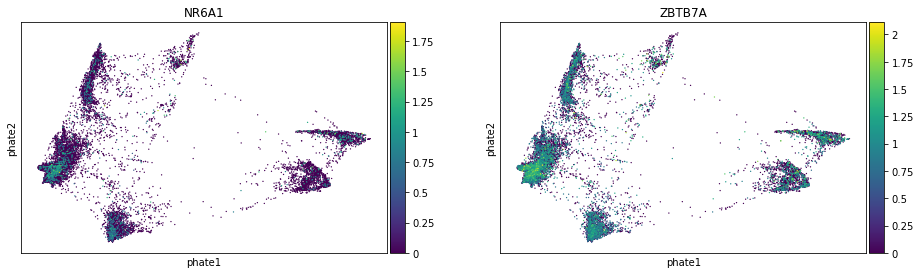

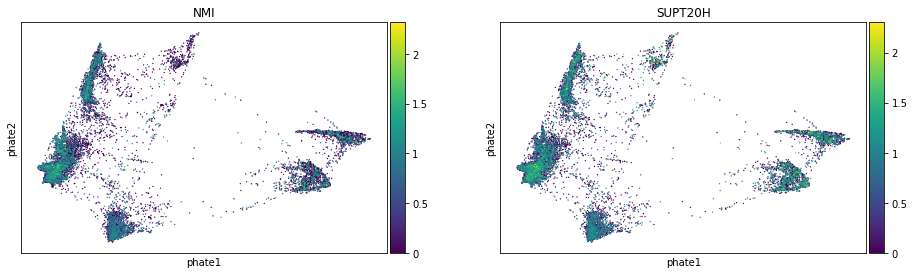

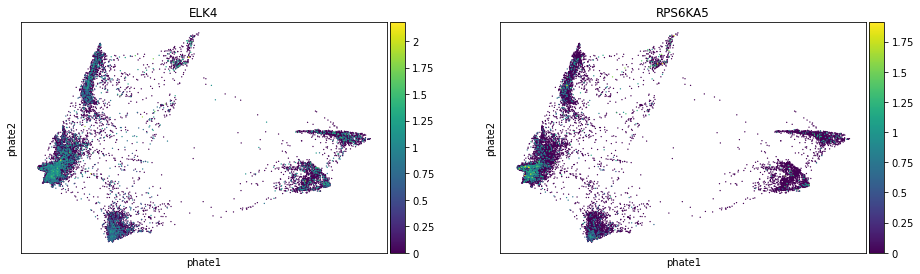

<IPython.core.display.Javascript object>

In [231]:
for gs in genes_per_cluster:
    sc.pl.scatter(adata, basis="phate", color=gs[:2], sort_order=False)

In [242]:
aaa = sc.read_h5ad(
    "/data/lab/datasets/Chaffer_2020_MET_Timecourse/processed/adata_combined_unfiltered.h5ad"
)

<IPython.core.display.Javascript object>

In [243]:
aaa.shape

(29136, 33538)

<IPython.core.display.Javascript object>

In [244]:
aaa

AnnData object with n_obs × n_vars = 29136 × 33538
    obs: 'n_counts', 'batch', 'day'
    var: 'gene_ids', 'feature_types', 'genome'

<IPython.core.display.Javascript object>

In [245]:
aaa.obs["day"].unique()

array([ 1.,  7., 14., 21.,  0.,  2., 12., 18., 30.])

<IPython.core.display.Javascript object>

In [247]:
aaa[aaa.obs["day"].isin([1, 7, 14, 21, 30])].write_h5ad(
    "/data/lab/datasets/Chaffer_2020_MET_Timecourse/processed/adata_atac_matched.h5ad"
)

<IPython.core.display.Javascript object>